# CS 467 Data Mining Extra Credit Assignment
### Gender demographic of Facebook and Twitter Data
* Why I was interested in finding <b>patterns</b> in these datasets?
  * Is there a relation or an observable pattern?
* Is there something else that I could extract from this?
  * Twitter usernames might not be a good <b>representation</b> of gender
    * We might be able to get an <b>estimate</b> by looking at the corresponding FB data genders.

In [125]:
import nltk
from nltk.corpus import names
import random
import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import csv

% %matplotlib inline

### Load in the Datasets
<b>FB Data</b>: Get the posts which have been liked along with the people who have liked it from <a href="https://developers.facebook.com/docs/graph-api/overview">FB Graph Explorer</a><br>
<b>Twitter Data</b>: Get the latest tweets using <a href="http://www.tweepy.org/">Tweepy</a> [code not shown as it has confidential API keys]

In [126]:
json_raw_data = []
folder_path = './fb_likes/'
for root, dirs, files in os.walk(folder_path):
    for count, file in enumerate(files):
            json_data = json.loads(open(folder_path + file).read())
            json_raw_data.append(json_data)

In [127]:
names_likers = []

def process_dict(input_list):
    for i in range(len(input_list)):
        intm_dict = input_list[i]
        if (intm_dict.has_key('likes')):
            intm_list = intm_dict['likes']['data']
            for j in range(len(intm_list)):
                data_dict = intm_list[j]
                names_likers.append(str(data_dict['name']))

for i in range(8):
    curr_dict = json_raw_data[i]
    if (i == 0):
        curr_list = curr_dict['posts']['data']
    else:
        curr_list = curr_dict['data']
    process_dict(curr_list)

In [128]:
usernames_tweets = []
with open('./akshatgupta95_tweets.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        tweet = row[2]
        usernames = [word[1:].rstrip('?:!.,;') for word in tweet.split() if word.startswith('@')]
        for username in usernames:
            usernames_tweets.append(username)

### Naive Bayes Gender Classification
[Citation] http://www.nltk.org/book/ch06.html<br>
Build a list of names labelled by the NLTK names corpus<br>
<br>
Why this when FB provides gender data?
* FB does, Twitter does not. So instead of doing them separately, build the classifier that works for both!

In [129]:
labeled_names = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])
random.shuffle(labeled_names)

In [130]:
def gender_features(word):
    return {'last_letter': word[-1]}

Form training and testing sets and work with the <b>Naive Bayes Classifier</b>. Take the first and last 500 data points as the training and testing data.

In [131]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

Use the classifier to predict classify names and usernames from FB and Twitter respectively and build the dictionaries.

In [132]:
gender_tracker = defaultdict(int)
for liker_name in names_likers:
    gender_tracker[classifier.classify(gender_features(liker_name.split(' ')[0]))] += 1

In [133]:
username_gender_tracker = defaultdict(int)
for username in usernames_tweets:
    username_gender_tracker[classifier.classify(gender_features(username))] += 1

### Visualize using Donuts!

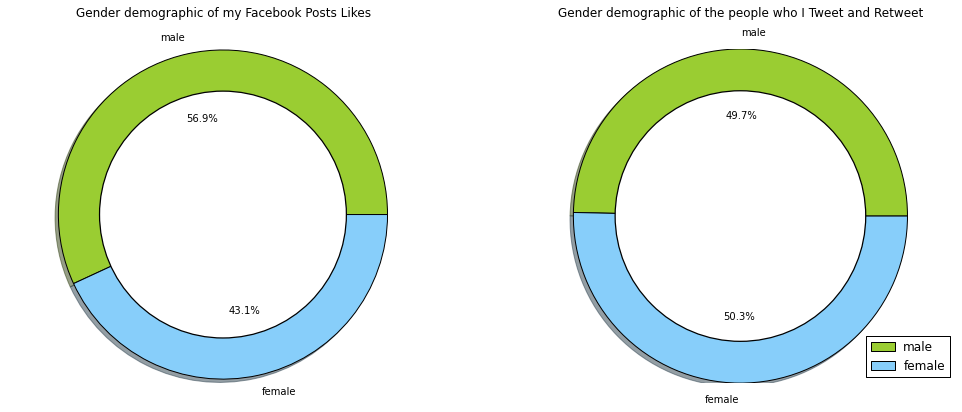

In [134]:
gender_tracker['plt_title'] = 'Gender demographic of my Facebook Posts Likes'
username_gender_tracker['plt_title'] = 'Gender demographic of the people who I Tweet and Retweet'
dict_trackers = [gender_tracker, username_gender_tracker]
i = 0
fig, ax = plt.subplots(2, figsize=(17, 6))
for curr_dict in dict_trackers:
    i += 1
    labels = 'male', 'female'
    sizes = [curr_dict['male'], curr_dict['female']]
    colors = ['yellowgreen', 'lightskyblue']
    explode = (0, 0)  # explode a slice if required

    plt.subplot(1, 2, i)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True)
    #draw a circle at the center of pie to make it look like a donut
    centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
    fig2 = plt.gcf()
    fig2.gca().add_artist(centre_circle)


    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.title(curr_dict['plt_title'], y=1.08)
    plt.axis('equal')
plt.legend(loc=4)
plt.show()

### Conclusion
The results that I noticed in the donuts showed me pretty interesting patterns.<br><br>
<b>Result Analysis</b>:<br>
* Eyeballing the donuts seems like there is a difference in the non ignorable percentage difference in the genders. 
  * The difference would be reduced by further fine tuning the classifier without letting it overfit the data.
* For the remainder of the analysis, I will assume that this difference is not significant.

<b>Possible Patterns</b>:<br>
* The my posts of FB and Tweets on Twitter are geared towards topics that interest people from both genders.
* Some of the recent TV shows I have watched are <a href="http://www.imdb.com/title/tt2707408/">Narcos</a> and <a href="http://www.imdb.com/title/tt1856010/">House of Cards</a>. I have previously watched <a href="http://www.imdb.com/title/tt0387199/">Entourage</a>, <a href="http://www.imdb.com/title/tt0773262/">Dexter</a>, among others. What's the pattern here?
  * The acting share of the male and female leads in these shows are almost equal.
  * Whenever I like someone's acting, I tweet or retweet! This possibly accounts for the almost equal gender ratio of my Twitter data.
* My FB likes are slightly skewed towards the males probably because the posts that I share myself, and which appear on other people's newsfeeds, are mostly related to sports like cricket and golf. I would assume that males have higher interest in this field.